In [185]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('Hours to Pay Mortgage.xlsx')
df.head()

,City,State,Median Home Listing Price,30-year Fixed Mortgage Rate,Monthly Mortgage Payment,Median Household Income,Hours per Month to Afford a Home,Number of Periods,Present Value
0,Toledo,Ohio,74900,0.0361,273,33687,16.9,360,59920
1,Memphis,Tennessee,88500,0.0359,321,36445,18.4,360,70800
2,Cleveland,Ohio,70000,0.0361,255,26150,20.3,360,56000
3,Buffalo,New York,90000,0.0360,327,31918,21.4,360,72000
4,Baltimore,Maryland,139000,0.0358,504,42241,24.9,360,111200


In [186]:
bands = [114,85,70,60,48,36,22]

In [187]:
def assign_band(x):
    for band in reversed(bands):
        if x < band:
            return '<' + str(band)
    return 'NoBand'

In [188]:
df['band'] = df['Hours per Month to Afford a Home'].apply(assign_band)
df['monthly_income'] = df['Median Household Income'].apply(lambda x: x/12.0)
df['mortgage_prop'] = df['Monthly Mortgage Payment'].apply(lambda x: x*100) / df['monthly_income'] 
df['income_k'] = df['Median Household Income'].apply(lambda x: x / 1000)
df['price_k'] = df['Median Home Listing Price'].apply(lambda x: x / 1000)

In [189]:
df

,City,State,Median Home Listing Price,30-year Fixed Mortgage Rate,Monthly Mortgage Payment,Median Household Income,Hours per Month to Afford a Home,Number of Periods,Present Value,band,monthly_income,mortgage_prop,income_k,price_k
0,Toledo,Ohio,74900,0.0361,273,33687,16.9,360,59920,<22,2807.250000,9.724820,33.687,74.900
1,Memphis,Tennessee,88500,0.0359,321,36445,18.4,360,70800,<22,3037.083333,10.569351,36.445,88.500
2,Cleveland,Ohio,70000,0.0361,255,26150,20.3,360,56000,<22,2179.166667,11.701721,26.150,70.000
3,Buffalo,New York,90000,0.0360,327,31918,21.4,360,72000,<22,2659.833333,12.294003,31.918,90.000
4,Baltimore,Maryland,139000,0.0358,504,42241,24.9,360,111200,<36,3520.083333,14.317843,42.241,139.000
5,Wichita,Kansas,153900,0.0357,558,45947,25.3,360,123120,<36,3828.916667,14.573313,45.947,153.900
6,Fort Wayne,Indiana,149900,0.0357,543,43774,25.9,360,119920,<36,3647.833333,14.885548,43.774,149.900
7,Milwaukee,Wisconsin,124800,0.0357,452,35958,26.2,360,99840,<36,2996.500000,15.084265,35.958,124.800
8,Indianapolis,Indiana,145000,0.0362,529,41987,26.3,360,116000,<36,3498.916667,15.118965,41.987,145.000
9,Columbus,Ohio,163840,0.0361,597,45659,27.3,360,131072,<36,3804.916667,15.690225,45.659,163.840


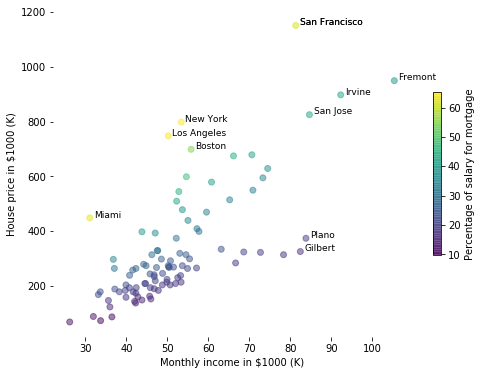

In [204]:
def annotate_city(city):
    df_city = df[df.City == city]
    city = df_city.iloc[0]
    plt.text(city.income_k+1, city.price_k+1, city.City, fontsize=9)
 
cities = list(df[df.mortgage_prop > 50]['City']) + list(df[df.income_k > 80]['City'])
for city in cities:
    annotate_city(city)

#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax = plt.scatter(df.income_k, df.price_k, c=df.mortgage_prop, alpha=0.5)
plt.xlabel('Monthly income in $1000 (K)')
plt.ylabel('House price in $1000 (K)')
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label('Percentage of salary for mortgage')
plt.box(False)


In [196]:
import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width and height 
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [16.0, 14.0]


In [192]:
median = df.mortgage_prop.median()

In [193]:
reduced_df = df[(df.mortgage_prop == median) | (df.mortgage_prop > 50 ) | (df.mortgage_prop < 12 )]

In [194]:
reduced_df

,City,State,Median Home Listing Price,30-year Fixed Mortgage Rate,Monthly Mortgage Payment,Median Household Income,Hours per Month to Afford a Home,Number of Periods,Present Value,band,monthly_income,mortgage_prop,income_k,price_k
0,Toledo,Ohio,74900,0.0361,273,33687,16.9,360,59920,<22,2807.250000,9.724820,33.687,74.9
1,Memphis,Tennessee,88500,0.0359,321,36445,18.4,360,70800,<22,3037.083333,10.569351,36.445,88.5
2,Cleveland,Ohio,70000,0.0361,255,26150,20.3,360,56000,<22,2179.166667,11.701721,26.150,70.0
48,Minneapolis,Minnesota,269900,0.0359,980,51480,39.7,360,215920,<48,4290.000000,22.843823,51.480,269.9
92,Boston,Massachusetts,699000,0.0356,2530,55777,94.7,360,559200,<114,4648.083333,54.431038,55.777,699.0
93,San Francisco,California,1150000,0.0355,4157,81294,106.7,360,920000,<114,6774.500000,61.362462,81.294,1150.0
94,Miami,Florida,449000,0.0357,1627,31051,109.4,360,359200,<114,2587.583333,62.877202,31.051,449.0
95,Los Angeles,California,748000,0.0355,2704,50205,112.4,360,598400,<114,4183.750000,64.631013,50.205,748.0
96,New York,New York,798000,0.0360,2902,53373,113.5,360,638400,<114,4447.750000,65.246473,53.373,798.0


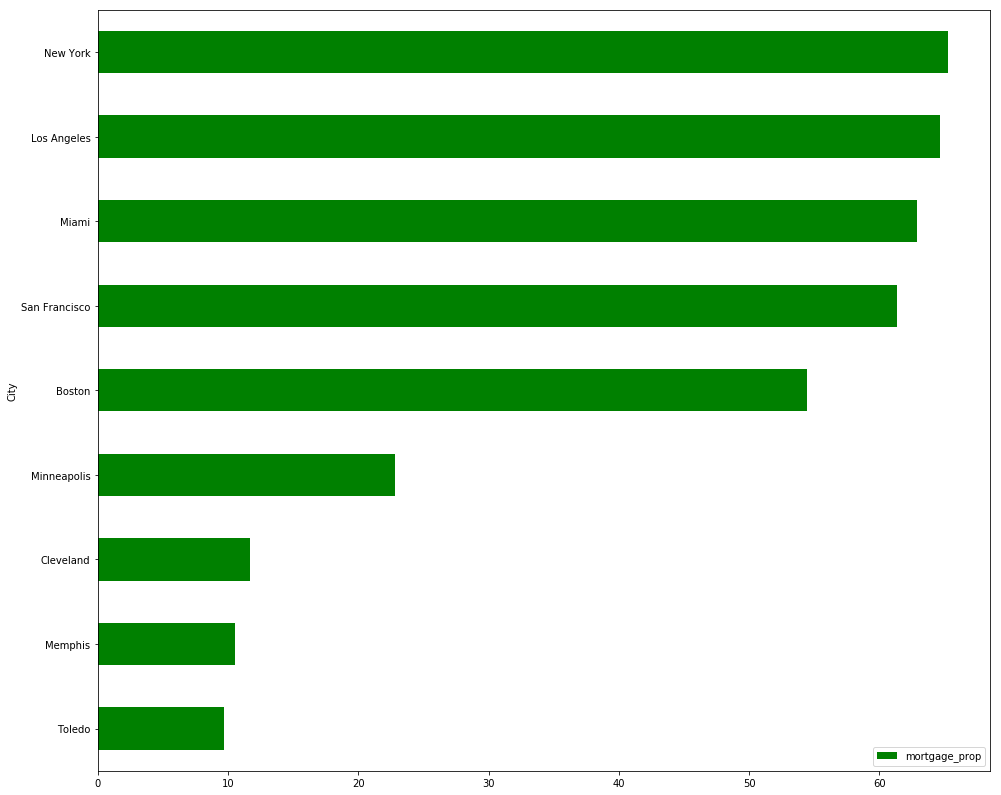

In [195]:
reduced_df.plot.barh(y='mortgage_prop', x='City', color='g')